# Superstore Sales Analysis

Ziel:
- Umsatz pro Kategorie/Region analyisieren
- Profitabilität prüfen
- Zeitreihen-Trends erkennen
- Busisness-Empfehlungen erstellen

**Dataset:** Es wird der Superstore Sales Datensatz verwendet (github)

In [2]:
# 1. Bibliotheken importieren
import pandas as pd # Daten laden, reinigen, gruppieren
import matplotlib.pyplot as plt # Basis-Plots
import seaborn as sns # Professionelle Visualisierungen

In [3]:
sns.set(style="whitegrid") # Macht alle Seaborn-Plots schöner + einheitlicher z.B. mit weißem Hintergrund + Gitterlinie (Grid)

In [ ]:
url = 'https://gist.github.com/nnbphuong/38db511db14542f3ba9ef16e69d3814c/raw/Superstore.csv'
df = pd.read_csv(url)

print("SPALTEN ANZAHL:", len(df.columns))
print("ALLE SPALTEN:", df.columns.tolist())
print("\nNUMERISCH:", df.select_dtypes(['float64','int64']).columns.tolist())
print("\nPROFIT MIN:", df['Profit'].min())

✅ SPALTEN ANZAHL: 21
ALLE SPALTEN: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

NUMERISCH: ['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']

PROFIT MIN: -6599.978


In [5]:
# 3. Erster Überblick
print ("Dataset Überblick:")
print (f"Anzahl Zeilen: {len(df)}") # alternativ würde auch print("Anzahl Zeilen: " + str(len(df))) gehen // len(df) in dem fall 9800, {len(df)} platziert die 9800 in den Text, f".." sagt python das es ein f-String ist -> ersetze {}!
print ("\nErste 5 Zeilen:") # \n sagt einfach neue Zeile 
df.head

Dataset Überblick:
Anzahl Zeilen: 9994

Erste 5 Zeilen:


<bound method NDFrame.head of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  2017-11-08  2017-11-11    Second Class   
1          2  CA-2017-152156  2017-11-08  2017-11-11    Second Class   
2          3  CA-2017-138688  2017-06-12  2017-06-16    Second Class   
3          4  US-2016-108966  2016-10-11  2016-10-18  Standard Class   
4          5  US-2016-108966  2016-10-11  2016-10-18  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2015-110422  2015-01-21  2015-01-23    Second Class   
9990    9991  CA-2018-121258  2018-02-26  2018-03-03  Standard Class   
9991    9992  CA-2018-121258  2018-02-26  2018-03-03  Standard Class   
9992    9993  CA-2018-121258  2018-02-26  2018-03-03  Standard Class   
9993    9994  CA-2018-119914  2018-05-04  2018-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       C

In [6]:
# 4. Daten vollständig prüfen (immernoch Überblick)
df.info() # gibt info über Spaltenname, Anzahl nicht-leerer Werte und Datentyp
# könnte auch print(df(info()) machen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9983 non-null   float64
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [30]:
df.describe

<bound method NDFrame.describe of       Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID     Customer Name    Segment        Country             City       State  Postal Code Region       Product ID         Category Sub-Category                                       Product Name     Sales  Quantity  Discount    Profit
0          1  CA-2017-152156  2017-11-08  2017-11-11    Second Class    CG-12520       Claire Gute   Consumer  United States        Henderson    Kentucky      42420.0  South  FUR-BO-10001798        Furniture    Bookcases                  Bush Somerset Collection Bookcase  261.9600         2      0.00   41.9136
1          2  CA-2017-152156  2017-11-08  2017-11-11    Second Class    CG-12520       Claire Gute   Consumer  United States        Henderson    Kentucky      42420.0  South  FUR-CH-10000454        Furniture       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3      0.00  219.5820
2          3  CA-2017-138688  

In [ ]:
# da describe nicht richtig funktioniert hat mal ein versuch nur numerische daten rauszubekommen:
# NUR NUMERISCHE SPALTEN finden (Sales, Profit, etc.)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist() # Nimm aus df nur die Spalten deren Datentyp Zahl ist (Float oder Integer) .columns nimmt davon nur die spaltennamen, .tolist() wandelt die spaltennamen von einem Index-Objekt in eine normale Python Liste um
print("NUMERISCHE SPALTEN (für describe()):")
print(numeric_cols)

# STATISTIKEN der Zahlen-Spalten
print("\n df.describe() – Statistiken:")
df[numeric_cols].describe()

📊 NUMERISCHE SPALTEN (für describe()):
['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']

📊 df.describe() – Statistiken:


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
print("ALLE SPALTENNAMEN:")
print(df.columns.tolist())
print("\n DATENTYPEN:")
print(df.dtypes)
print("\n NUR NUMERISCHE SPALTEN:")
print(df.select_dtypes(include=['float64','int64']).columns.tolist())

🔍 ALLE SPALTENNAMEN:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

📊 DATENTYPEN:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

🔢 NUR NUMERISCHE SPALTEN:
['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']


In [ ]:
#  FEHLENDE WERTE prüfen
print("\n Fehlende Werte:")
print(df.isnull().sum())


❌ Fehlende Werte:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64


# Wir brauchen keine Daten Bereinigen (Dreck entfernen) isnull hat auch gezeigt das es außer beim PLZ keine nullstellen gibt die man füllen müsste also weiter mit EDA

In [ ]:
# Ziel: Alle 9800 Bestellungen bzw Werte nach "Category" einordnen bzw mit groupby gruppiert. groupby('Category') gruppiert alle 9800 Bestellung in 3 Gruppen
# Sortieren von Groß nach Klein (Beste zuerst)
# ['Sales']
# Auch ein einfacher code wie df.columns ist wichtig, weil man hier sehen kann welche Spalten es gibt, entsprechend kann man diese dann Analysieren (zB Profit, Sales, Gewinn etc.)
# Davor möchte ich noch testen wie viel kategorien es gibt, welche und wie viele bestellungen jeweils in dieser Kategorie sind:
# SCHRITT 0: ANZAHL KATEGORIEN CHECKEN
print("Anzahl Kategorien:", df['Category'].nunique())
print("Welche Kategorien:", df['Category'].unique())
print()

# Schritt 1: Durchschnittlicher Umsatz pro Kategorie
kategorie_umsatz = df.groupby('Category')['Sales'].mean().sort_values(ascending=False) # von links nach rechts lesen: nimm das dataframe df, gruppiere nach category, nehme aus jeder gruppe die sales spalte, und rechne den durchschnitt, sortiere die Werte in umgekehrte reihenfolge
# Zeile drüber hätte man auch so schreiben können ohne variable: print(df.groupby('Category')['Sales'].mean().sort_values(ascending=False).round(2))
print("Durchschnittlicher Umsatz pro Kategorie:")
print(kategorie_umsatz.round(2)) # round(2) heißt 2 nachkommastellen
print()

# Schritt 2: Durchschnittlicher Gewinn pro Kategorie
kategorie_gewinn = df.groupby('Category')['Profit'].mean().sort_values(ascending=False)
print("Durchschnittlicher Gewinn pro Kategorie:")
print(kategorie_gewinn.round(2))

Anzahl Kategorien: 3
Welche Kategorien: ['Furniture' 'Office Supplies' 'Technology']

Durchschnittlicher Umsatz pro Kategorie:
Category
Technology         452.71
Furniture          349.83
Office Supplies    119.32
Name: Sales, dtype: float64

Durchschnittlicher Gewinn pro Kategorie:
Category
Technology         78.75
Office Supplies    20.33
Furniture           8.70
Name: Profit, dtype: float64


In [11]:
# Schritt 3: Anzahl + Namen der Regionen
print("Anzahl Regionen:", df['Region'].nunique()) # Beispiel Auto-Farben, die daten/liste sieht so aus rot,blau,rot,grün,blau, dieser befehl sagt aus das es in diesem fall egal wie viel daten nur (Anzahl) 3 verschiedene "objekte" gibt welche wären rot,blau,grün
print("Welche Regionen:", df['Region'].unique()) # Unique wiederrum gibt die Namen wieder, Merke: .nunique() -> Zahl (Wie viele verschiedene?)// .unique() -> Namen (Welche verschiedene?)
print()

# Schritt 4: Durchschnittlicher Umsatz pro Region
print("Durchschnittlicher Umsatz pro Region:")
print(df.groupby('Region')['Sales'].mean().sort_values(ascending=False).round(2))
print()

# Schritt 5: Durchschnittlicher Gewinn pro Region
print("Durchschnittlicher Gewinn pro Region:")
print(df.groupby('Region')['Profit'].mean().sort_values(ascending=False).round(2))

Anzahl Regionen: 4
Welche Regionen: ['South' 'West' 'Central' 'East']

Durchschnittlicher Umsatz pro Region:
Region
South      241.80
East       238.34
West       226.49
Central    215.77
Name: Sales, dtype: float64

Durchschnittlicher Gewinn pro Region:
Region
West       33.85
East       32.14
South      28.86
Central    17.09
Name: Profit, dtype: float64


In [12]:
# Kunden-Typen (Corporate/Consumer/Home Office)
print("Anzahl Segmente:", df['Segment'].nunique())
print("Welche Segmente:", df['Segment'].unique())
print()

print("Umsatz pro Segment:")
print(df.groupby('Segment')['Sales'].mean().sort_values(ascending=False).round(2))
print()

print("Gewinn pro Segment:")
print(df.groupby('Segment')['Profit'].mean().sort_values(ascending=False).round(2))

Anzahl Segmente: 3
Welche Segmente: ['Consumer' 'Corporate' 'Home Office']

Umsatz pro Segment:
Segment
Home Office    240.97
Corporate      233.82
Consumer       223.73
Name: Sales, dtype: float64

Gewinn pro Segment:
Segment
Home Office    33.82
Corporate      30.46
Consumer       25.84
Name: Profit, dtype: float64


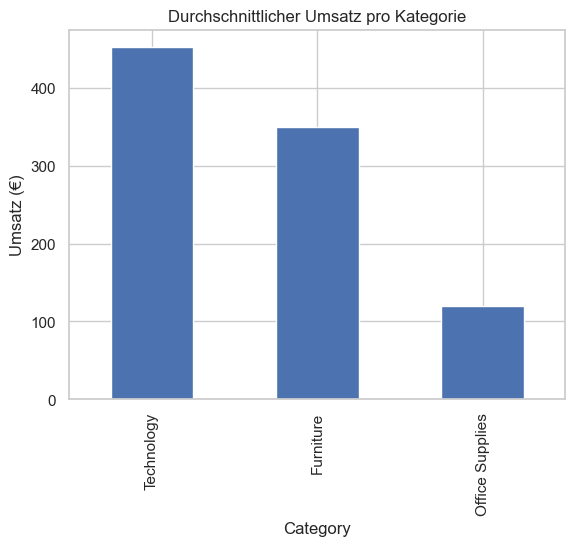

In [13]:
# Diagramm 1: Umsatz pro Kategorie
kategorie_umsatz = df.groupby('Category')['Sales'].mean().sort_values(ascending=False)
kategorie_umsatz.plot(kind='bar')
plt.title("Durchschnittlicher Umsatz pro Kategorie")
plt.ylabel("Umsatz (€)")
plt.show()

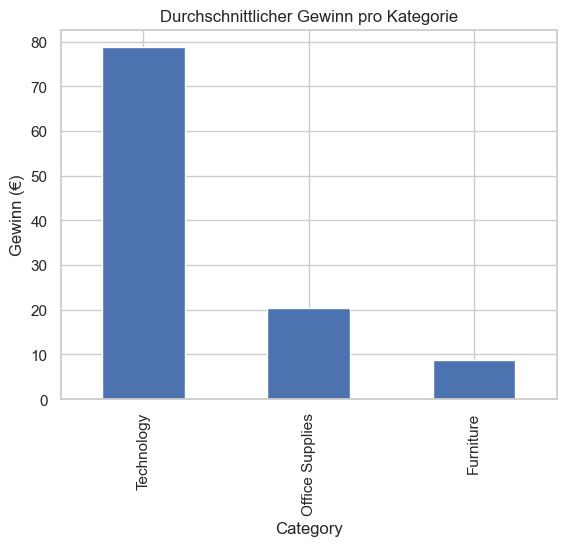

In [44]:
# Diagramm 2: Gewinn pro Kategorie
kategorie_gewinn = df.groupby('Category')['Profit'].mean().sort_values(ascending=False)
kategorie_gewinn.plot(kind='bar')
plt.title("Durchschnittlicher Gewinn pro Kategorie")
plt.ylabel("Gewinn (€)")
plt.show()

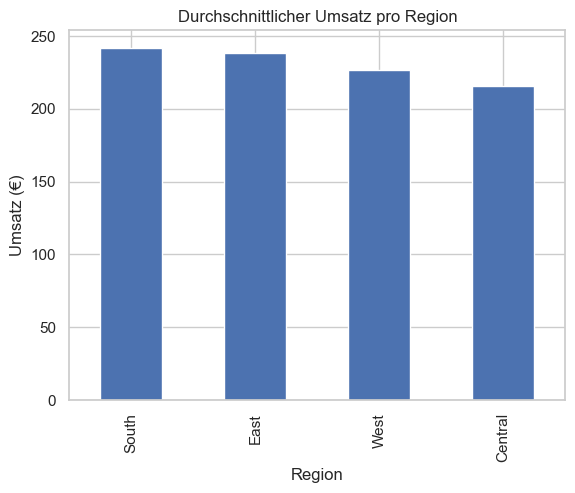

In [14]:
# Diagramm 3: Umsatz pro Region
region_umsatz = df.groupby('Region')['Sales'].mean().sort_values(ascending=False)
region_umsatz.plot(kind='bar')
plt.title("Durchschnittlicher Umsatz pro Region")
plt.ylabel("Umsatz (€)")
plt.show()

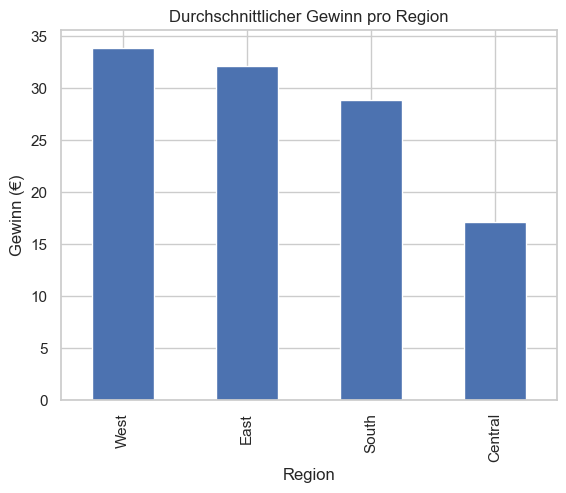

In [15]:
# Diagramm 4: Gewinn pro Region
region_gewinn = df.groupby('Region')['Profit'].mean().sort_values(ascending=False)
region_gewinn.plot(kind='bar')
plt.title("Durchschnittlicher Gewinn pro Region")
plt.ylabel("Gewinn (€)")
plt.show()

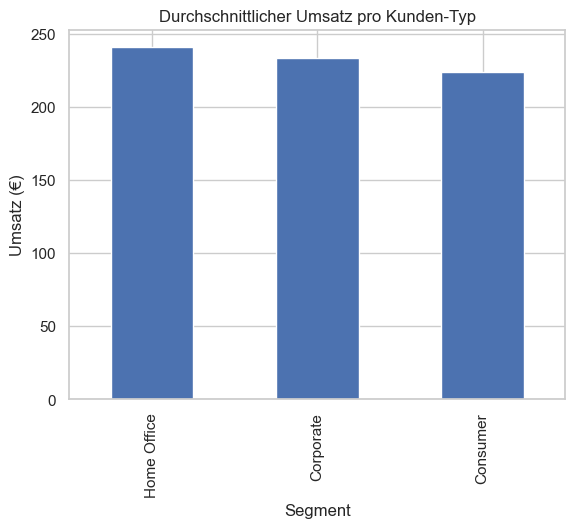

In [16]:
# Diagramm 5: Umsatz pro Segment (Kunden-Typen)
segment_umsatz = df.groupby('Segment')['Sales'].mean().sort_values(ascending=False)
segment_umsatz.plot(kind='bar')
plt.title("Durchschnittlicher Umsatz pro Kunden-Typ")
plt.ylabel("Umsatz (€)")
plt.show()

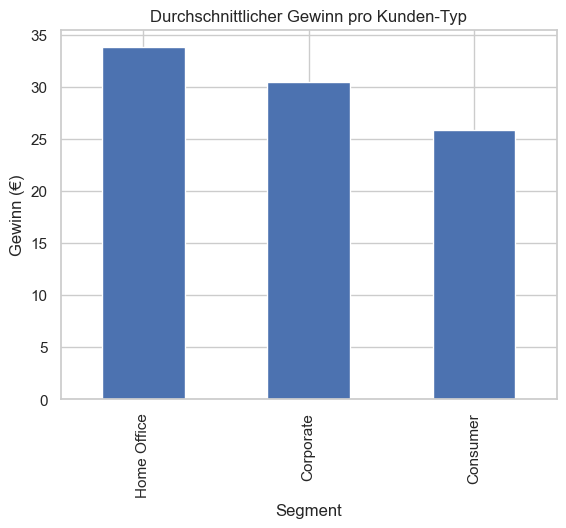

In [17]:
# Diagramm 6: Gewinn pro Segment (Kunden-Typen)
segment_gewinn = df.groupby('Segment')['Profit'].mean().sort_values(ascending=False)
segment_gewinn.plot(kind='bar')
plt.title("Durchschnittlicher Gewinn pro Kunden-Typ")
plt.ylabel("Gewinn (€)")
plt.show()

In [18]:
# Korrelation: Hängen Umsatz + Gewinn zusammen?
numeric_cols = df.select_dtypes(['float64','int64']).columns
korrelation = df[numeric_cols].corr()
print("Korrelation Sales vs Profit:")
print(korrelation.loc['Sales', 'Profit'].round(3))

Korrelation Sales vs Profit:
0.479


In [ ]:
# Einfacher Report (3 Zeilen pro Insight)
print("TOP UMSATZ KATEGORIE:")
print(df.groupby('Category')['Sales'].mean().round(0).idxmax())
print(df.groupby('Category')['Sales'].mean().round(0).max())
print()

print("TOP GEWINN KATEGORIE:")
print(df.groupby('Category')['Profit'].mean().round(0).idxmax())
print(df.groupby('Category')['Profit'].mean().round(0).max())
print() # Das hätte ich auch so machen können das ich erstmal eine Variable erstelle die es berechnet und danach einfach jeweils Name: / Wert: und den code mit idxmax und max z.B.:profit_pro_kategorie.idxmax()) 

print("TOP REGION UMSATZ:")
print("Name :", df.groupby('Region')['Sales'].mean().round(0).idxmax())
print("Wert :", df.groupby('Region')['Sales'].mean().round(0).max())
print()

print("Korrelation Sales/Profit:", round(df[['Sales','Profit']].corr().iloc[0,1], 3))

TOP UM SATZ KATEGORIE:
Technology
453.0

TOP GEWINN KATEGORIE:
Technology
79.0

TOP REGION UM SATZ:
Name : South
Wert : 242.0

Korrelation Sales/Profit: 0.479


In [26]:
# FINAL REPORT (Top-Werte)
print("=== TOP 3 ===\n")
print("1. Beste Kategorie Umsatz:", df.groupby('Category')['Sales'].mean().round(0).idxmax())
print("2. Beste Kategorie Gewinn:", df.groupby('Category')['Profit'].mean().round(0).idxmax())
print("3. Beste Region Umsatz:", df.groupby('Region')['Sales'].mean().round(0).idxmax())


=== TOP 3 ===

1. Beste Kategorie Umsatz: Technology
2. Beste Kategorie Gewinn: Technology
3. Beste Region Umsatz: South
